# Pytorch and Tensorflow 102 Polynomial Regression

The polynomial regression is the next step, the main difference apart from linear regression is the number of weights.

First, let's consider customize ML without using pytorch or TensorFlow

In [297]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'y = 1000-2x - 4x^2')

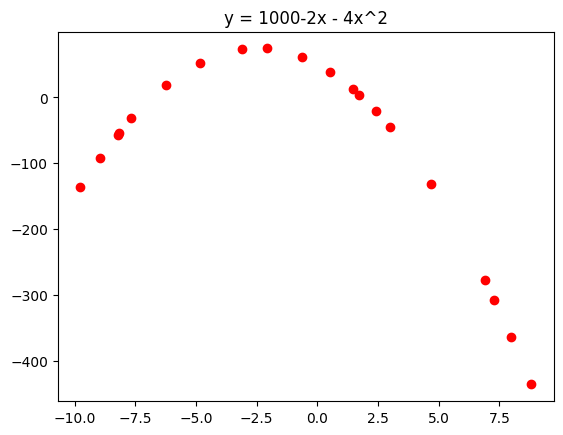

In [298]:
# we define 
X = np.random.uniform(low=-10, high=10, size=(20,)).astype(float)
Y = 50-(20*X) - (4*(X**2))
X_test = np.random.uniform(low=-10, high=10, size=(20,)).astype(float)
plt.plot(X,Y,'ro')
plt.title("y = 1000-2x - 4x^2")

In [304]:
def forward(x,w0,w1,w2): 
    return w0 + (w1*x) + (w2*(x)**2)
def loss(y,y_predicted):
    return np.mean((y_predicted-y)**2)
class gredient_loss():
    def __init__(self,x,y,y_predicted):
        self.x = x 
        self.y = y
        self.y_predicted = y_predicted

    def order0(self):
        return 2*np.mean((self.y_predicted-self.y))
                      
    def order1(self):
        return np.mean(2 * (self.y_predicted - self.y) * self.x)
    
    def order2(self):
        return np.mean(2 * (self.y_predicted - self.y) * (self.x**2))


In [305]:

epochs = 100000
initial_lr = 0.0001
w0,w1,w2 = np.random.rand(3)

for epoch in range(epochs):
    learning_rate = initial_lr 
    y_predict = forward(X,w0,w1,w2)
    l         = loss(Y,y_predict)
    gredient  = gredient_loss(X,Y,y_predict)
    dw0,dw1,dw2  = gredient.order0(),gredient.order1(),gredient.order2()
    w0   -= learning_rate*dw0
    w1   -= learning_rate*dw1
    w2   -= learning_rate*dw2

    if epoch % 10000 == 0:
        print(f'epoch:{epoch+1}: w0 = {w0:.3f},w1 = {w1:.3f},w2 = {w2:.3f}, loss = {l:.8f}')

epoch:1: w0 = 0.535,w1 = 0.793,w2 = -0.633, loss = 42592.27476010
epoch:10001: w0 = 28.248,w1 = -19.687,w2 = -3.644, loss = 196.05010853
epoch:20001: w0 = 40.499,w1 = -19.863,w2 = -3.845, loss = 37.40787335
epoch:30001: w0 = 45.850,w1 = -19.940,w2 = -3.932, loss = 7.13771086
epoch:40001: w0 = 48.187,w1 = -19.974,w2 = -3.970, loss = 1.36193030
epoch:50001: w0 = 49.208,w1 = -19.989,w2 = -3.987, loss = 0.25986681
epoch:60001: w0 = 49.654,w1 = -19.995,w2 = -3.994, loss = 0.04958459
epoch:70001: w0 = 49.849,w1 = -19.998,w2 = -3.998, loss = 0.00946112
epoch:80001: w0 = 49.934,w1 = -19.999,w2 = -3.999, loss = 0.00180526
epoch:90001: w0 = 49.971,w1 = -20.000,w2 = -4.000, loss = 0.00034446


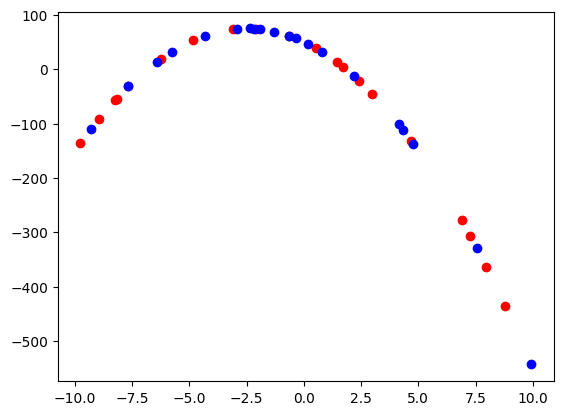

In [306]:
plt.plot(X,Y,'ro')
plt.plot(X_test,forward(X_test,w0,w1,w2),'bo')

In [303]:
epochs = 10000
initial_lr = 0.0001
w0,w1,w2 = np.random.rand(3)
batch_size = 4  # Mini-batch size

for epoch in range(epochs):
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        Y_batch = Y[i:i+batch_size]

        y_predict = forward(X_batch, w0, w1, w2)
        l = loss(Y_batch, y_predict)
        gredient = gredient_loss(X_batch, Y_batch, y_predict)
        dw0, dw1, dw2 = gredient.order0(), gredient.order1(), gredient.order2()

        w0 -= learning_rate * dw0
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2

    if epoch % 1000 == 0:
        print(f'epoch:{epoch+1}: w0 = {w0:.3f},w1 = {w1:.3f},w2 = {w2:.3f}, loss = {l:.8f}')


epoch:1: w0 = 0.954,w1 = 0.175,w2 = -2.274, loss = 11756.68526699
epoch:1001: w0 = 17.533,w1 = -19.476,w2 = -3.412, loss = 508.39490337
epoch:2001: w0 = 28.617,w1 = -19.655,w2 = -3.613, loss = 220.51295379
epoch:3001: w0 = 35.917,w1 = -19.773,w2 = -3.745, loss = 95.64604693
epoch:4001: w0 = 40.725,w1 = -19.850,w2 = -3.832, loss = 41.48584533
epoch:5001: w0 = 43.892,w1 = -19.901,w2 = -3.889, loss = 17.99421323
epoch:6001: w0 = 45.977,w1 = -19.935,w2 = -3.927, loss = 7.80487193
epoch:7001: w0 = 47.351,w1 = -19.957,w2 = -3.952, loss = 3.38531199
epoch:8001: w0 = 48.255,w1 = -19.972,w2 = -3.968, loss = 1.46835687
epoch:9001: w0 = 48.851,w1 = -19.981,w2 = -3.979, loss = 0.63689016


### Pytorch with Polynomial Regression

In [ ]:
def s